# ****LOGISTIC REGRESSION****

## ****1. Data Exploration:****

a. Load the dataset and perform exploratory data analysis (EDA).

b. Examine the features, their types, and summary statistics.

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Analyze any patterns or correlations observed in the data.


### Import Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Here we have titani_train and titanic_test datsets we need to predict the who are the people survived in titanic 

we are loading the titanic train and titanic test datsets into train and test 

In [20]:
train=pd.read_csv("Titanic_train.csv")
test=pd.read_csv("Titanic_test.csv")

printing the 1st 5 rows from the train dataset 

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


printing the rows and columns of the train dataset

In [24]:
print("Rows: ",train.shape[0])
print("Columns: ",train.shape[1])

Rows:  891
Columns:  12


statistical information of the train dataset

In [30]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


information of the dataset

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### EDA

#### Categorical attributes

In [37]:
train['Survived'].unique()

array([0, 1], dtype=int64)

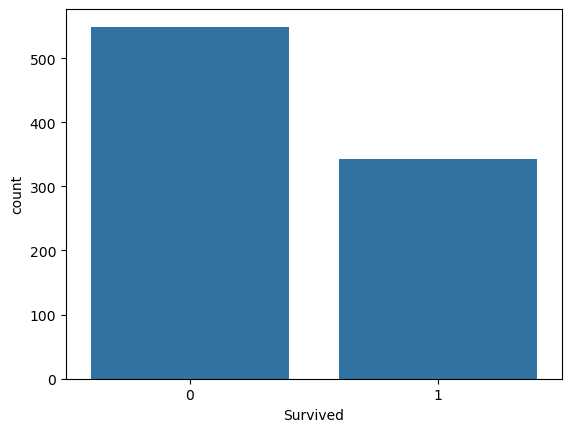

In [39]:
sns.countplot(x='Survived',data=train)
plt.show()

In [41]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

we can see high not survival count

In [44]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

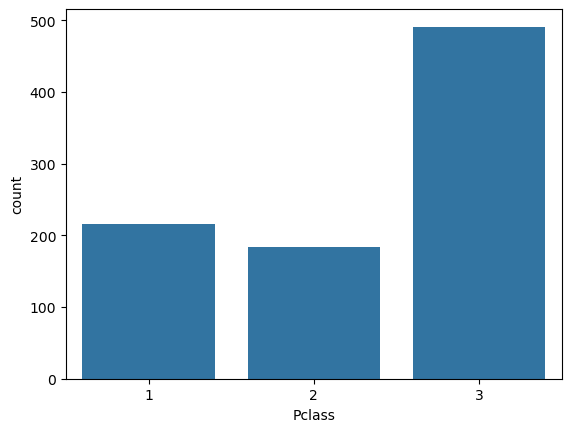

In [46]:
sns.countplot(x='Pclass',data=train)
plt.show()

In [47]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

here we see more no of people are in 3rd class 

In [51]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

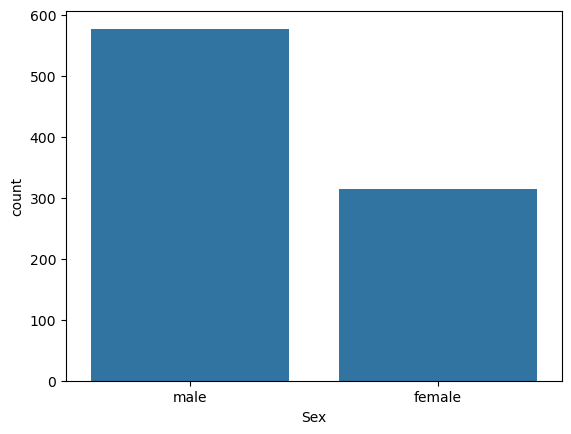

In [53]:
sns.countplot(x='Sex',data=train)
plt.show()

In [55]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

males are more comapred to females who are boarded on titanic 

In [58]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

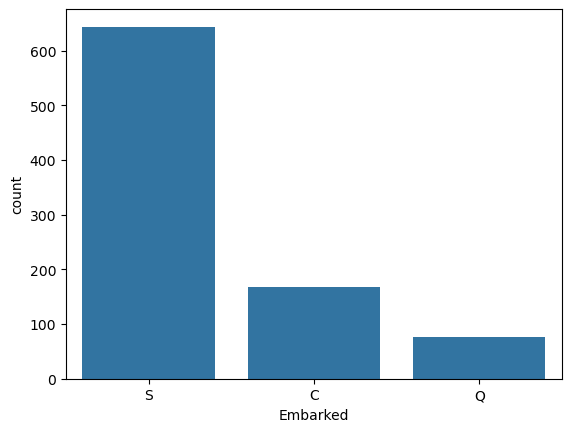

In [60]:
sns.countplot(x='Embarked',data=train)
plt.show()

In [62]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

more embarked in s 

In [65]:
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

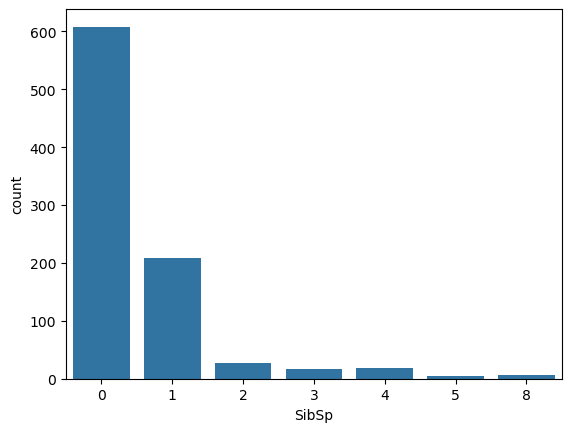

In [67]:
sns.countplot(x='SibSp',data=train)
plt.show()

we can see more people with no siblings and spouses

In [70]:
train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

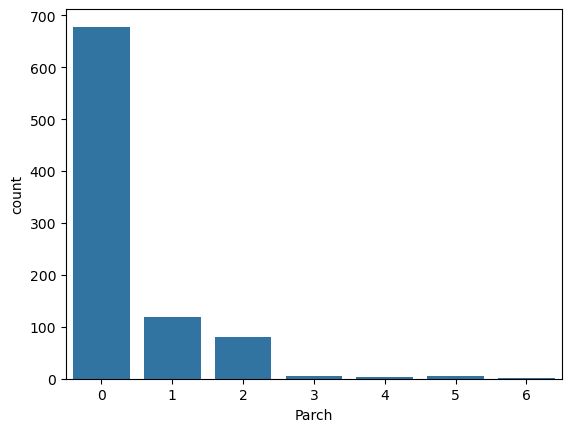

In [72]:
sns.countplot(x='Parch',data=train)
plt.show()

we can see more with no parents and childerns who are boarded on titanic

#### Numeric attributes

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


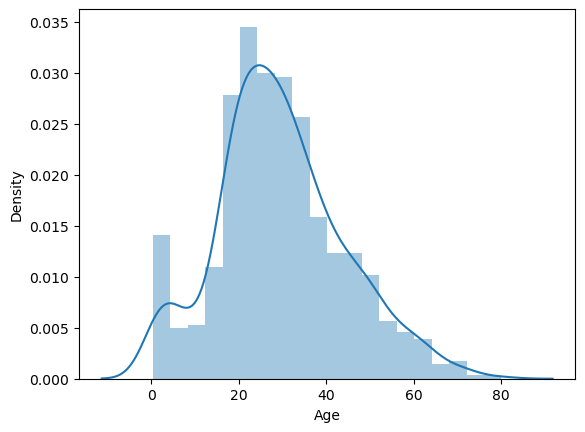

0.38910778230082704

In [78]:
sns.distplot(train['Age'])
plt.show()
train['Age'].skew()

from the above distribution plot we can see age is almost normally distributed 

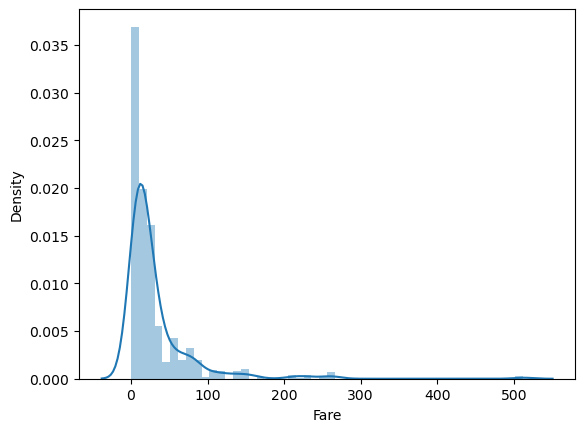

4.787316519674893

In [81]:
sns.distplot(train['Fare'])
plt.show()
train['Fare'].skew()

we can see fare is positively skewed 

In [84]:
class_fare=train.pivot_table(index='Pclass',values='Fare')
class_fare

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


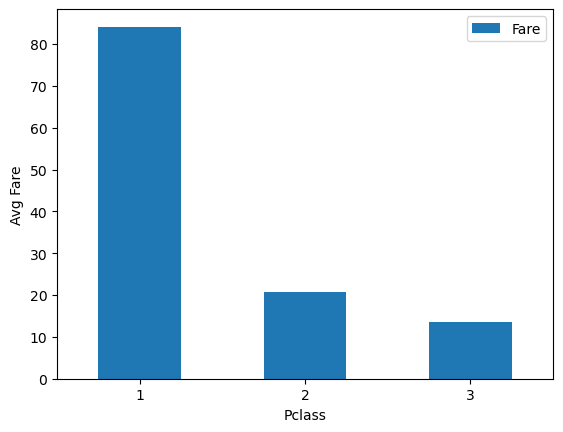

In [86]:
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg Fare')
plt.xticks(rotation=0)
plt.show()

avg fare of 1st class is high when compared to 2nd and 3rd classes

In [53]:
class_fare=train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_fare

,Fare
Pclass,
1,18177.4125
2,3801.8417
3,6714.6951


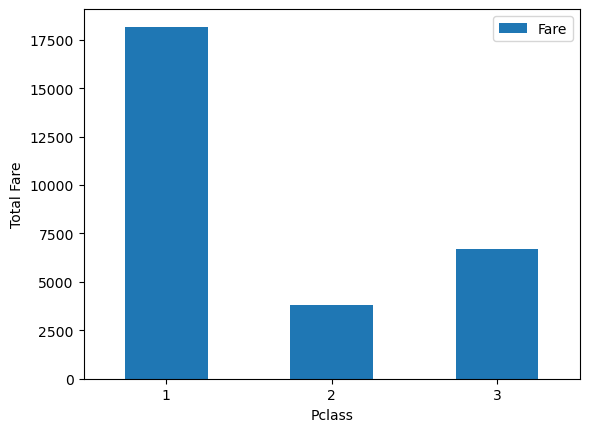

In [54]:
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

total fare of 1st class is higher 

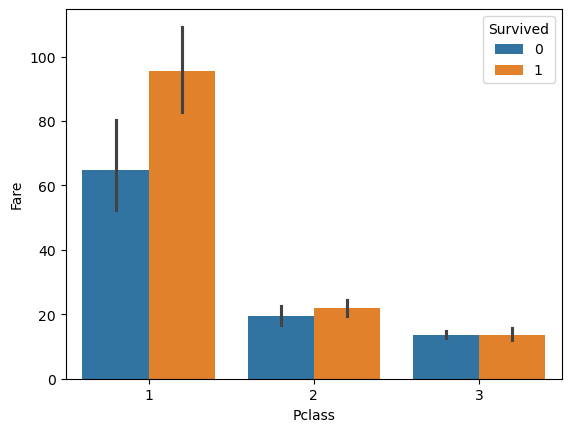

In [56]:
sns.barplot(data=train,x='Pclass',y='Fare',hue='Survived')
plt.show()

when we lool at the graph we can see the survival count is higher in 1st class we can assume the more the fare the higher the survival count 

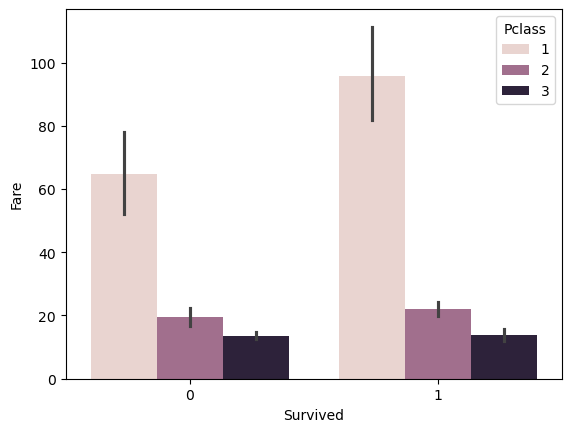

In [58]:
sns.barplot(data=train,x='Survived',y='Fare',hue='Pclass')
plt.show()

we can clearly see the survival count is high from 1st class

-------------------------------------------------------------------------------

## ****2. Data Preprocessing:****

a. Handle missing values (e.g., imputation).

b. Encode categorical variables.


length of train dataset 

In [96]:
train_len=len(train)
train_len

891

we are combining both train and test datasets in to one dataframe and 

In [99]:
df=pd.concat([train,test],axis=0)

In [101]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


resetting the index 

In [106]:
df=df.reset_index(drop=True)

In [108]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


after combining both train and test data the shape of data is 1309 rows and 12 columns 

In [113]:
df.shape

(1309, 12)

check for null values 

In [116]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

here the cabin have more null values so lets drop the cabin

and next we see survived we can say those are from the test dataset

and next we have age with 263 null values and fare with 1 nul so lets fill them with the mean 

and next when we come to embarked as it is categorical lets fill the null values with mode 

dropping the cabin column

In [120]:
df=df.drop(columns=['Cabin'],axis=1)

calculation of mean values for age and fare and filling them in the null places 

In [124]:
df['Age'].mean()

29.881137667304014

In [126]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

calculating mode for embarked and filling it in the null values 

In [129]:
df['Embarked'].mode()[0]

'S'

In [131]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

now checking for null values 

In [134]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

no null values except survived we we said them as from test dataset

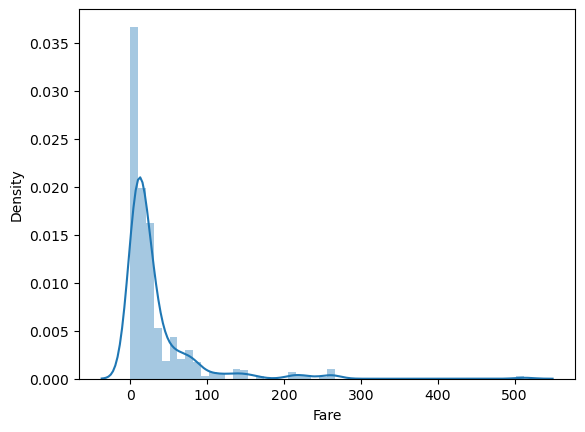

4.369374593951007

In [139]:
sns.distplot(df['Fare'])
plt.show()
df['Fare'].skew()

we can see fare is positively skewed so lets apply log transformation as the skewness is very less

In [142]:
df['Fare']=np.log(df['Fare']+1)

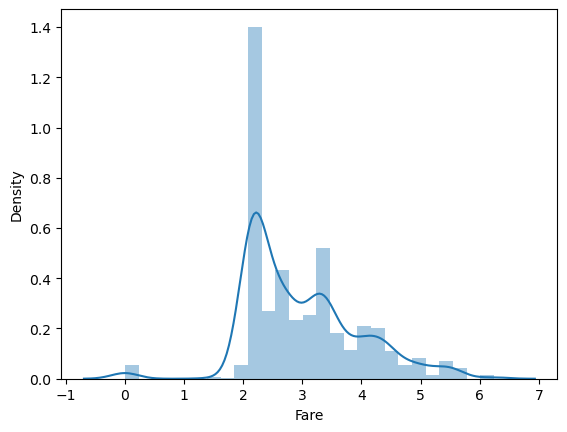

0.5407183855517869

In [146]:
sns.distplot(df['Fare'])
plt.show()
df['Fare'].skew()

after applying log transformation we can see the fare is almost distributed normally 

In [149]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

we are dropping the columns for correlation as it takes only numerical data 

In [152]:
df_corr=df.drop(columns=['Name','Sex','Ticket','Embarked'])

In [154]:
df_corr.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [156]:
corr=df_corr.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025731,-0.055224,0.008942,0.020159
Survived,-0.005007,1.000000,-0.338481,-0.070323,-0.035322,0.081629,0.329862
Pclass,-0.038354,-0.338481,1.000000,-0.366371,0.060832,0.018322,-0.685333
Age,0.025731,-0.070323,-0.366371,1.000000,-0.190747,-0.130872,0.174203
SibSp,-0.055224,-0.035322,0.060832,-0.190747,1.000000,0.373587,0.311334
Parch,0.008942,0.081629,0.018322,-0.130872,0.373587,1.000000,0.323252
Fare,0.020159,0.329862,-0.685333,0.174203,0.311334,0.323252,1.000000


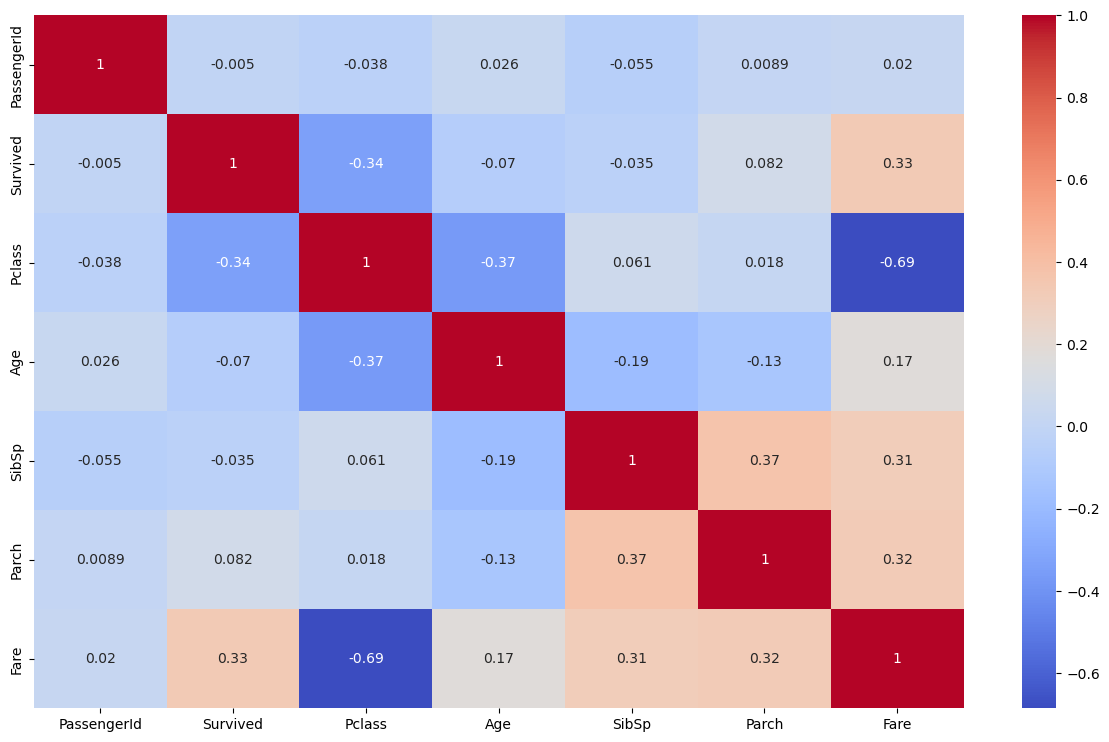

In [158]:
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

lets see here Fare and Pclass are highly correlated

In [161]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


we are dropping the unnecessary columns which are not needed 

In [164]:
df=df.drop(columns=['Name','Ticket','PassengerId'])

In [166]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

we are applying labelencoding for sex and embarked 

In [169]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [171]:
cols=['Sex','Embarked']
for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,2.110213,2
1,1.0,1,0,38.0,1,0,4.280593,0
2,1.0,3,0,26.0,0,0,2.188856,2
3,1.0,1,0,35.0,1,0,3.990834,2
4,0.0,3,1,35.0,0,0,2.202765,2


---

## ****3. Model Building:****

a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.


#### train test split and model building

we are splitting the df into the original train and test datasets

In [177]:
train=df.iloc[:train_len,:]
test=df.iloc[train_len:,:]

In [179]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,2.110213,2
1,1.0,1,0,38.0,1,0,4.280593,0
2,1.0,3,0,26.0,0,0,2.188856,2
3,1.0,1,0,35.0,1,0,3.990834,2
4,0.0,3,1,35.0,0,0,2.202765,2


In [181]:
test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,NaN,3,1,34.5,0,0,2.178064,1
892,NaN,3,0,47.0,1,0,2.079442,2
893,NaN,2,1,62.0,0,0,2.369075,1
894,NaN,3,1,27.0,0,0,2.268252,2
895,NaN,3,0,22.0,1,1,2.586824,2


#### X and Y splits 

In [184]:
X=train.drop(columns=['Survived'],axis=1)
Y=train['Survived']

In [186]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [188]:
Y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

we are splitting the train dataset into 80% training and 20% testing 

In [196]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=45)

fitting the model

In [199]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

## ****4. Model Evaluation:****

a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

Visualize the ROC curve.


In [205]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,roc_curve,roc_auc_score
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)[:,1]

confusion matrix and performance metrics 

In [208]:
cm=confusion_matrix(Y_test,y_pred)
accuracy=accuracy_score(Y_test,y_pred)
recall=recall_score(Y_test,y_pred)
f1=f1_score(Y_test,y_pred)

In [210]:
print("Confusion matrix:\n",cm)
print("Accuracy:",accuracy)
print("Recall:",recall)
print("f1 score:",f1)

Confusion matrix:
 [[100  17]
 [ 14  48]]
Accuracy: 0.8268156424581006
Recall: 0.7741935483870968
f1 score: 0.7559055118110236


In [212]:
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
print("specificity:",specificity)

specificity: 0.8547008547008547


ROC curve 

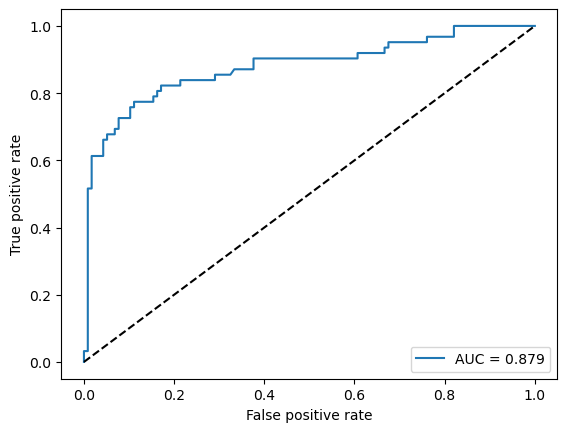

In [215]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(Y_test, y_pred_proba):.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc="lower right")
plt.show()


In [217]:
roc_curve(Y_test,y_pred_proba)
FP,TP,dummy=roc_curve(Y_test,y_pred_proba)

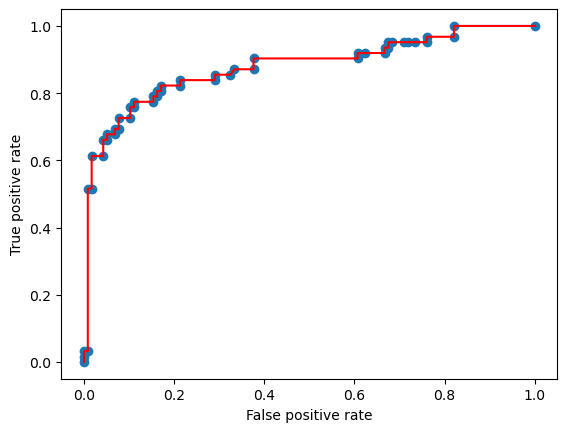

In [219]:
plt.scatter(FP,TP)
plt.plot(FP,TP,color='red')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

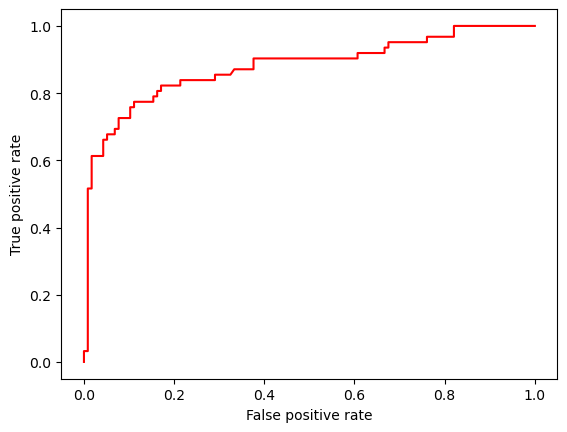

In [221]:
plt.plot(FP,TP,color='red')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

AUC score

In [224]:
auc_score=roc_auc_score(Y_test,y_pred_proba)
print("auc_score",np.round(auc_score,3))

auc_score 0.879


## ****5. Interpretation:****

a. Interpret the coefficients of the logistic regression model.

b. Discuss the significance of features in predicting the target variable (survival probability in this case).


In [227]:
import numpy as np
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
})
coefficients.sort_values(by='Odds Ratio', ascending=False)


,Feature,Coefficient,Odds Ratio
5,Fare,0.497543,1.644675
2,Age,-0.041163,0.959672
6,Embarked,-0.076278,0.926558
4,Parch,-0.253841,0.775815
3,SibSp,-0.449341,0.638049
0,Pclass,-0.733248,0.480346
1,Sex,-2.561424,0.077195


## ****6. Deployment with Streamlit:****

In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

In [230]:
# Save the Streamlit app to a Python file
streamlit_code = """
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
train = pd.read_csv(r"C:\\Users\\dell\\DATA SCIENCE_ExcelR\\Assignments\\Assignment - 7\\Titanic_train.csv")

# Preprocess the data (same as in the notebook)
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
train["Age"].fillna(train["Age"].mean(), inplace=True)

# Initialize LabelEncoders
le_sex = LabelEncoder()
train["Sex"] = le_sex.fit_transform(train["Sex"])

le_embarked = LabelEncoder()
train["Embarked"] = le_embarked.fit_transform(train["Embarked"])

# Prepare input data for prediction
X = train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
Y = train["Survived"]

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X, Y)

# Streamlit app
st.title('Titanic Survival Prediction')
pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['Male', 'Female'])
age = st.slider('Age', 1, 100)
sibsp = st.slider('Number of Siblings/Spouses Aboard', 0, 8)
parch = st.slider('Number of Parents/Children Aboard', 0, 6)
fare = st.slider('Fare Paid', 0, 500)
embarked = st.selectbox('Port of Embarkation', ['S', 'C', 'Q'])

# Convert input to the encoded format for the model
input_data = [
    pclass,
    le_sex.transform([sex.lower()])[0],
    age,
    sibsp,
    parch,
    fare,
    le_embarked.transform([embarked])[0]
]

if st.button('Predict Survival'):
    prediction = model.predict([input_data])[0]
    probability = model.predict_proba([input_data])[0][1]
    st.write(f"Prediction: {'Survived' if prediction == 1 else 'Not Survive'}")
    st.write(f"Probability of Survival: {probability:.2f}")
"""

In [232]:
with open("titanic_app.py", "w") as f:
    f.write(streamlit_code)

In [234]:
import subprocess
def run_streamlit():
    subprocess.Popen(["streamlit", "run", "titanic_app.py"])

run_streamlit()

In [236]:
import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\dell\DATA SCIENCE_ExcelR\Assignments\Assignment - 7


In [238]:
print("Streamlit app is running. Open the link below in your web browser:")
print("http://localhost:8503/")

Streamlit app is running. Open the link below in your web browser:
http://localhost:8503/


## ****Interview Questions:****


#### What is the difference between precision and recall?

Precision measures the accuracy of positive predictions i.e., out of all the instances your model predicted as positive, how many were actually correct. 

Recall measures the completeness of positive predictions i.e., out of all the actual positive instances that exist, how many did your model successfully identify.

#### What is cross-validation, and why is it important in binary classification?

Cross-validation is a resampling technique to assess how well a machine learning model generalizes to new, unseen data by repeatedly splitting the data into training and validation sets, training the model, and averaging the performance metrics.

It's crucial in binary classification to provide a more reliable estimate of a model's performance than a single train-test split, helping to detect issues like overfitting.